In [250]:
import random

def getPopulation(size,pop,components):
    population=[]#place to store the generated population
    for i in range(pop):
        #get a random bag and add it to the population
        population.append(getRandBag(components,size))
    return population
        
def getRandBag(components,size):
    bag=[]
    for x in range(len(components)):
        bag.append(0)
    capacity=0
    fitness=0
    #set random max size for a bag
    randMax=random.randint(1,size)
    #while bag isn't full
    while(capacity<randMax):
        #get random component thats not in bag
        i=random.randint(0,len(components)-1)
        while(bag[i]==1):
            i=random.randint(0,len(components)-1)
        #if component fits in bag
        if((components[i][1]+capacity)<=randMax):
            #add to bag
            bag[i]=1
            capacity=capacity+components[i][1]
            fitness=fitness+components[i][0]
        else:
            #if it doesn't add
            z=0
            while(((components[i][1]+capacity)>randMax) and (z<len(components))):
                #randomly pick a value till one fits
                i=random.randint(0,len(components)-1)
                z=z+1
            #then add it to the bag if one fits
            if(z!=len(components)):
                bag[i]=1
                capacity=capacity+components[i][1]
                fitness=fitness+components[i][0]
    temp=[bag,capacity,fitness]
    return temp


def evalGenes(size,crossover,rate,population,components):
    #pick 2 random genes
    a=random.randint(0,len(population)-1)
    b=random.randint(0,len(population)-1)
    while(b==a):
        b=random.randint(0,len(population)-1)
    #compare fitness
    if(population[a][2]>population[b][2]):
        #a is better
        temp=[a,b,0]
        population=(crossoverGenes(temp,crossover,population,size,components))
    elif(population[b][2]>population[a][2]):
        #b is better
        temp=[b,a,0]
        population=(crossoverGenes(temp,crossover,population,size,components))
    else:
        #do nothing
        temp=[0,0,1]
    popuation=mutate(temp,rate,population,size,components)
    #calc new fitnesses
    population=calcFitness(population,temp[1],components)
    #calc new weight
    population=calcWeight(population,temp[1],components)
    return population
    
def crossoverGenes(WinLos,crossover,population,size,components):
    #get winner and loser
    W=population[WinLos[0]]
    L=population[WinLos[1]]
    #randomly pick genes at a decided rate
    for i in range(len(population)*crossover):
        #see if it mutates
        m=random.randint(0,100)
        if(m<=crossover):
            genePicker=random.randint(0,len(components)-1)
            #if winners gene is 1 and losers is 0 change losers to 1
            if((W[0][genePicker]==1) and (L[0][genePicker]==0) and (L[1]<+size)):
                population[WinLos[1]][0][genePicker]=1
                population=calcWeight(population,WinLos[1],components)
                if(population[WinLos[1]][1]>20):
                    population[WinLos[1]][0][genePicker]=0
            #if winners gene is 0 and losers is 1 change losers to 0
            elif(W[0][genePicker]==0) and (L[0][genePicker]==1):
                population[WinLos[1]][0][genePicker]=0
                population=calcWeight(population,WinLos[1],components)
            else:
                #if its already the same do nothing
                return population
    return population

def mutate(WinLos,rate,population,size,components):
    loser=population[WinLos[1]]
    for i in range(len(population)):
        #see if it mutates
        m=random.randint(0,100)
        if(m<=rate):
            genePicker=random.randint(0,len(components)-1)
            #if losers gene is 1
            if(loser[0][genePicker]==1):
                population[WinLos[1]][0][genePicker]=0
                population=calcWeight(population,WinLos[1],components)
            #if losers gene is 0
            elif(loser[0][genePicker]==0 and (loser[1]<+size)):
                population[WinLos[1]][0][genePicker]=1
                population=calcWeight(population,WinLos[1],components)
                if(population[WinLos[1]][1]>20):
                    population[WinLos[1]][0][genePicker]=0
    return population
        

def calcFitness(population,a,components):
    #calc fitness of loser
    fA=0
    for i in range(len(components)):
        if (population[a][0][i]==1):
            fA=fA+components[i][0]
    population[a][2]=fA
    return population

def calcWeight(population,a,components):
    #calc weight given bag
    wA=0
    for i in range(len(components)):
        if (population[a][0][i]==1):
            wA=wA+components[i][1]
    population[a][1]=wA
    return population

def getBest(population):
    #intitiate variables
    best=0
    worst=100000000000
    #check all bags to get highest and lowest
    for i in range(len(population)):
        if(population[i][2]>best):
            best=population[i][2]
        if(population[i][2]<worst):
            worst=population[i][2]
    return (best,worst)

In [251]:
def geneticAlg(size,its,pop,crossover,rate,components):
    #get population
    population=getPopulation(size,pop,components)
    points=[]
    #generate number of arays needed for each set of plot points
    for i in range(pop):
        points.append([0])
    
    #run for decided num of iterations
    for i in range(its):
        #evaluate two random genes
        population=evalGenes(size,crossover,rate,population,components)
        
        # add new fitnesses to points
        for x in range(len(population)):
            points[x].append(population[x][2])
    
    #get best fitness
    BW=getBest(population)
    print('Best Fitness', BW[0])
    print('Worst Fitness', BW[1])
    return points
        
#list of possible items that can be in a bag
components=[[5,3],[6,2],[1,4],[9,5],[2,8],[8,9],[4,10],[3,1],[7,6],[10,7]]

#geneticAlg(20,100,10,50,components)

Best Fitness 33
Worst Fitness 3


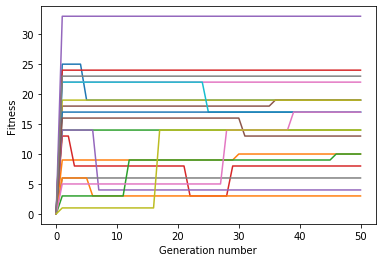

In [330]:
import matplotlib.pyplot as plt
#function to call GA and plot points
def plotPopGA(size,its,pop,crossover,rate,components):
    #get points from alg
    points=geneticAlg(size,its,pop,crossover,rate,components)
    #plot points on the graph
    for i in range(pop-1):
        plt.plot(points[i])
    plt.ylabel('Fitness')
    plt.xlabel('Generation number')
    plt.show()
#       size,its,pop,cross,rate,components
plotPopGA(20,50,20,100,0,components)

## 